# Advanced analysis

In [1]:
import scyan

Global seed set to 0


## Working with hierarchical populations
For some projects, you may try to annotate many dozens of different populations. It becomes difficult for the human eye to differentiate so many colors on a UMAP. For this reason, you can create multi-level population names (each level going further into the details of the populations), and display only populations at a certain level or go through subpopulations of one specific group of cells.

### Example
To demonstrate what we call "hierarchical population display", we consider the following two-level multi-index dataframe for the AML dataset.

In [2]:
adata, marker_pop_matrix = scyan.data.load("aml", table="groups_demo")
marker_pop_matrix

,,CD19,CD4,CD8,CD34,CD20,CD45,CD123,CD11c,CD7,CD16,CD38,CD3,HLA-DR,CD64
Populations,level,,,,,,,,,,,,,,
Basophils,Basophils,-1,NaN,-1.0,-1,-1.0,NaN,1,-1,-1.0,-1.0,NaN,-1,-1.0,-1.0
CD4 T cells,CD4 T cells,-1,1.0,-1.0,-1,-1.0,NaN,-1,-1,NaN,-1.0,NaN,1,-1.0,-1.0
CD8 T cells,CD8 T cells,-1,-1.0,1.0,-1,-1.0,NaN,-1,-1,1.0,-1.0,NaN,1,-1.0,-1.0
CD16- NK cells,NK cells,-1,NaN,NaN,-1,-1.0,NaN,-1,-1,1.0,-1.0,NaN,-1,-1.0,-1.0
CD16+ NK cells,NK cells,-1,NaN,NaN,-1,NaN,NaN,-1,-1,1.0,1.0,NaN,-1,-1.0,-1.0
CD34+CD38+CD123- HSPCs,HSPCs,-1,NaN,-1.0,1,-1.0,-1.0,-1,-1,-1.0,-1.0,1.0,-1,NaN,-1.0
CD34+CD38+CD123+ HSPCs,HSPCs,-1,NaN,-1.0,1,-1.0,-1.0,1,-1,-1.0,-1.0,1.0,-1,NaN,-1.0
CD34+CD38lo HSCs,HSCs,-1,NaN,-1.0,1,-1.0,-1.0,-1,-1,-1.0,-1.0,-1.0,-1,NaN,-1.0
Mature B cells,B cells,1,NaN,-1.0,-1,NaN,NaN,-1,-1,-1.0,-1.0,-1.0,-1,NaN,NaN


And we initialize and train the Scyan model.

In [ ]:
model = scyan.Scyan(adata, marker_pop_matrix)
model.fit()
model.predict();

The following graph shows the hierarchy of populations, leaves being the smallest detail of populations. In practice, Scyan will annotate "leaves populations", but we can use the tree structure to plot annotations of the "large populations" (i.e. the first level of this tree); see below.

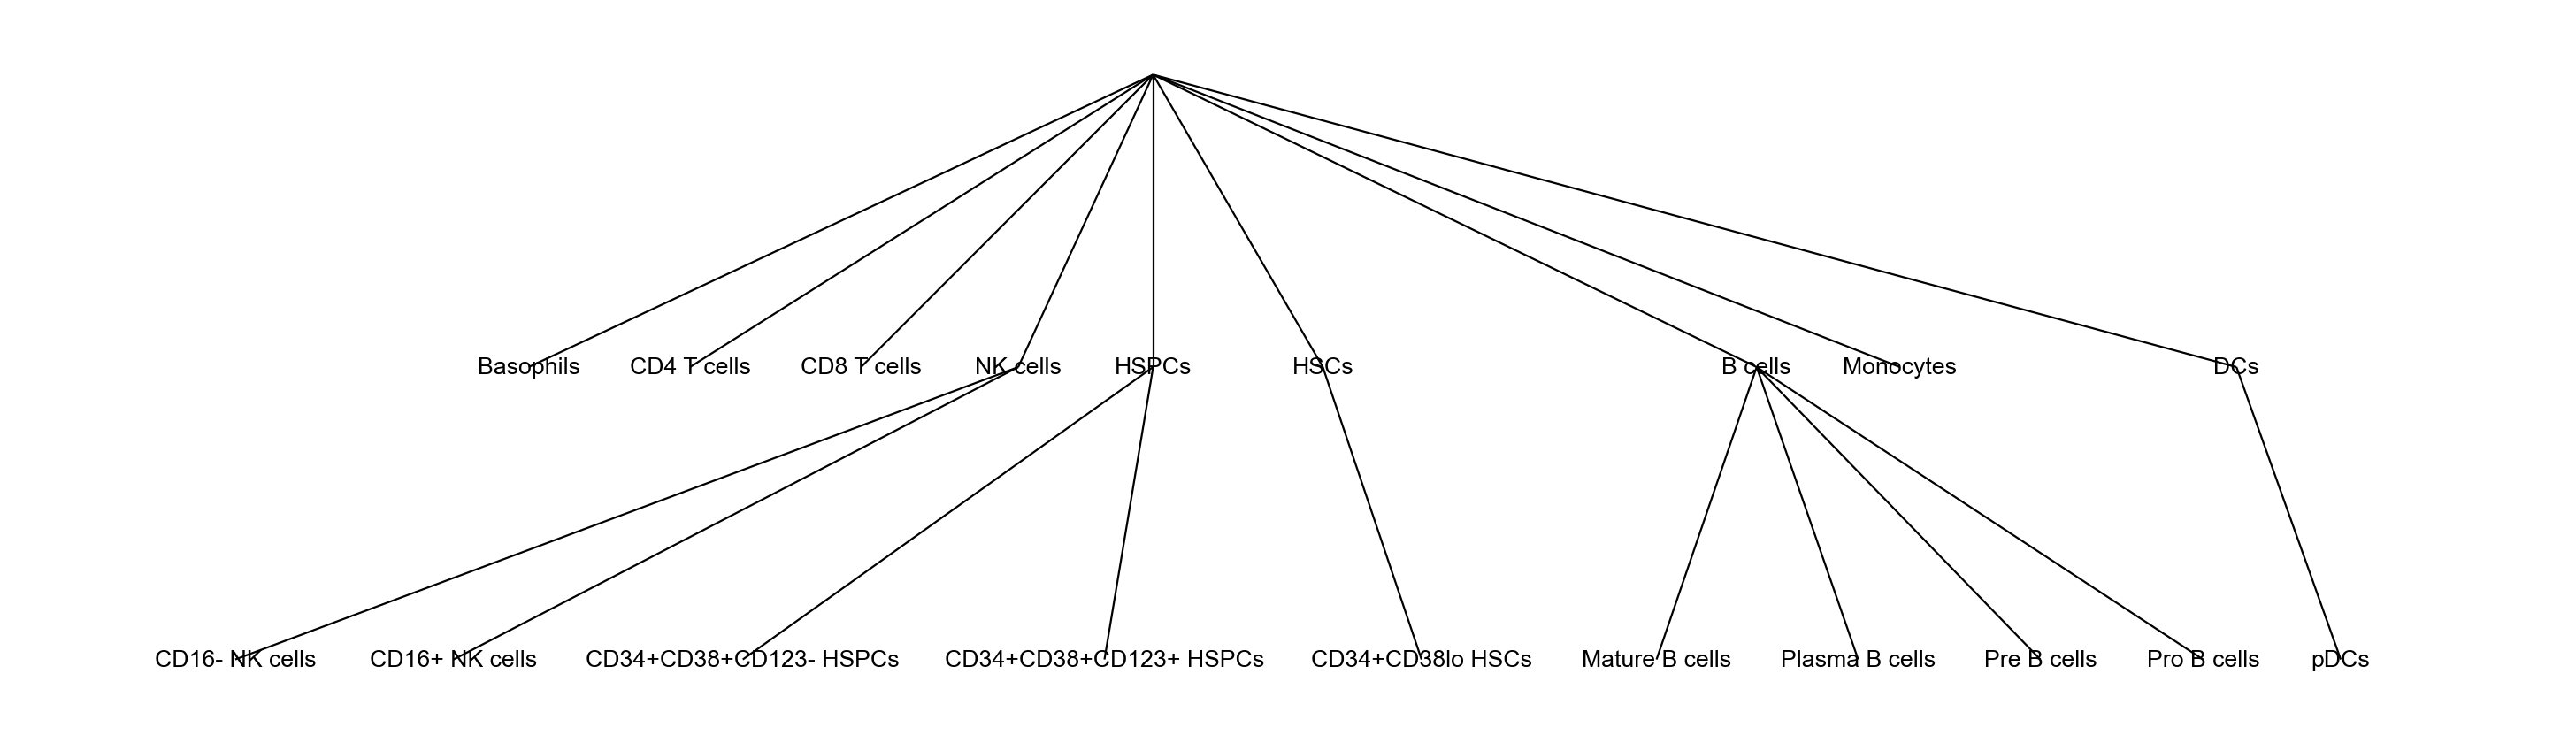

In [5]:
scyan.plot.pops_hierarchy(model)

### How to create a population hierarchy in your table
To create a hierarchical classification of your populations, add (to your knowledge table) one or multiple columns whose names start with `level` (e.g., `level1`, `level_main_population`, or just `level`). We recommend writing these columns after the first column.
The easiest way to create these columns is to manually add them to your knowledge table's `csv` file; see an example [here](https://github.com/MICS-Lab/scyan_data/blob/main/data/aml/groups_demo.csv).

> NB: the first column corresponds to the most detailed population names (i.e. leaves on the tree above), and it contains the population names that Scyan will use for its annotation. The name of this first column should **not** start with `level`, contrary to the columns used to make the population hierarchy.

You don't need any other formatting because `scyan` will detect the levels using their names and return a multi-index dataframe as displayed above.

### Plot the different population levels on a UMAP

You can use the key associated with a specific level to display all populations at this level.

E.g., if you want to display the level called `level2`, use `color="scyan_pop_level2"`.

/opt/homebrew/Caskroom/miniforge/base/envs/bio/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


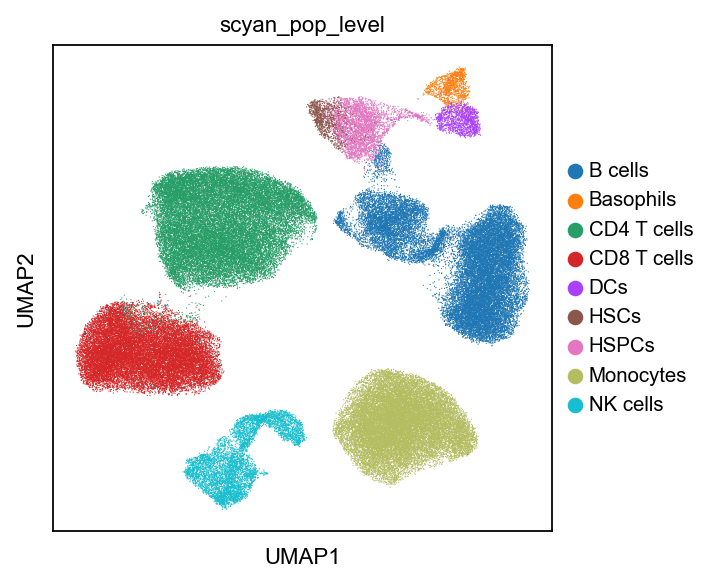

In [6]:
scyan.plot.umap(adata, color="scyan_pop_level") # Plot all main/large populations

You can also use [`scyan.plot.pop_level`](../../api/plots/#scyan.plot.pop_level) to display subpopulations from one group at this level. By default, it uses `level='level'`, but you can change it.

/opt/homebrew/Caskroom/miniforge/base/envs/bio/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


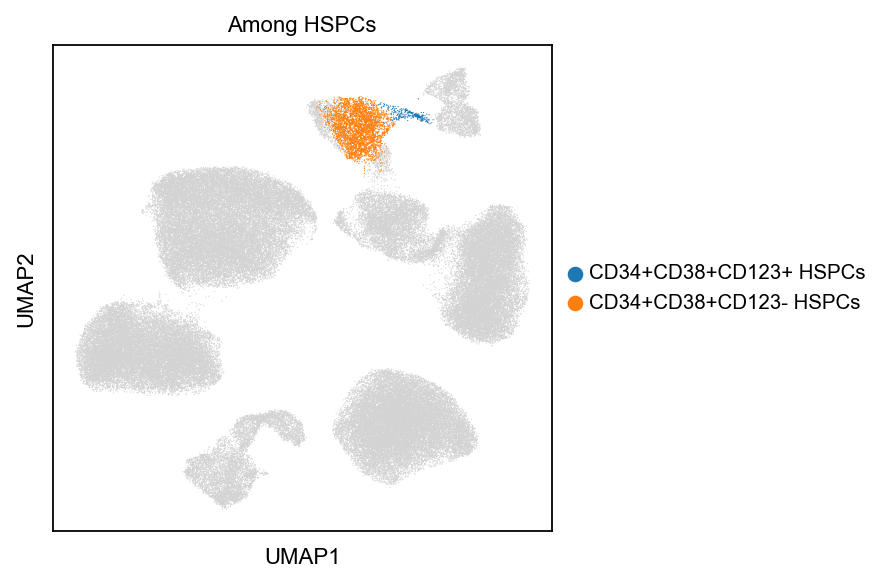

/opt/homebrew/Caskroom/miniforge/base/envs/bio/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


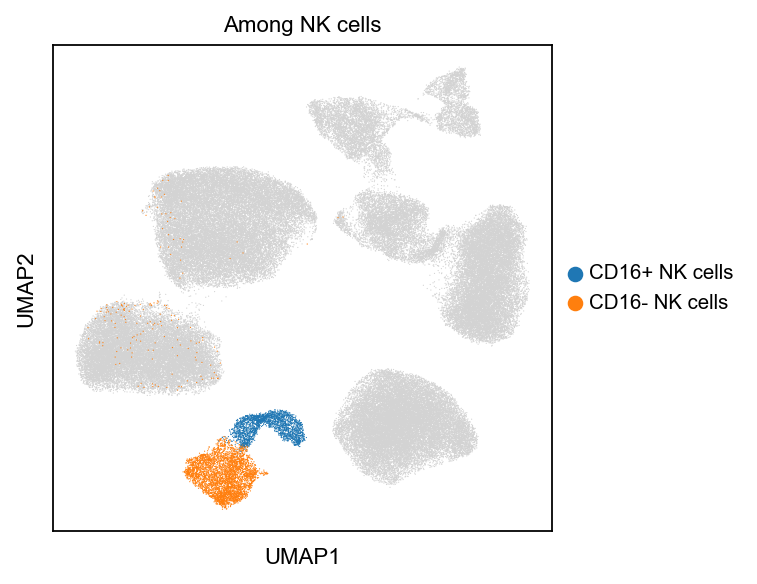

In [7]:
scyan.plot.pop_level(model, "HSPCs") # Plot all populations that belongs to the group "B cells"
scyan.plot.pop_level(model, "NK cells") # Plot all populations that belongs to the group "NK cells"

### Using the other tools and plots available

Most plots and tools can also be used on a specific level. Actually, when making prediction, scyan also added keys in your `adata.obs` corresponding to each level. Thus, when available, provide `obs_key="scyan_pop_<level>"` to any plot or tool to work at this specific level (where `<level>` is one of `model.level_names`).

Note also that [`model.pops(...)`](../../api/model/#scyan.model.Scyan.pops) can help you navigating through the different populations at different levels of the tree.